<a href="https://colab.research.google.com/github/rpradata-ud/DSPS_RPradata/blob/main/HW/HW3/HW3_RPradata_Submit_KS_earthquakes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created by FedericaBBianco @fedhere for DSPS/MLNPS
# Kolmogorov Smirnoff test, application to earthquake data

In [ ]:
#all the imports I needed
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import scipy as sp
from scipy import stats
%pylab inline
#pl.style.use("https://raw.githubusercontent.com/fedhere/DSPS/master/fbb.mplstyle")

Populating the interactive namespace from numpy and matplotlib


This homework asks you to reproduce the work in [Corral 2018](https://arxiv.org/pdf/0910.0055.pdf) which is well described, but not "reproducible".
Corral 2018 uses a K-S test to show that at different magnitude scales the time gaps between earthquakes follows the same distribution. If true, this indicates that there is a consistent scaling law.

The argument is a little convoluted, but it is a somewhat innovative use of the test. Corall compares the time gap between earthquakes  greater than a certain magnitude threshold with the time gaps between earthquakes above a different threshold, and finds no differences.

Remind yourself exactly what the K-S test is about :

    1 What is the test's Null Hypothsis that the K-S test tests?
    
    


The Null Hypothesis says that both data sets in the test come from the same distribution.




    2 What is the "statistic" or "pivotal quantity" that the test uses?
    


The pivotal quantity of the KS-test in this study is the maximum difference (absolute value) between the rescaled cumulative distribution function (cdf) of two datasets:


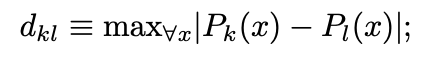

(equation 4 in paper)


    3 What does the probability distribution of this statistic depend on?
    
   


The probability distribution of the statistic depends on the number of data N in each of the sets. Particularly, equation 5:

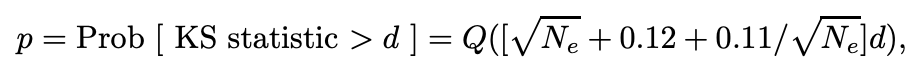

where Q is a decreasing function with values between 1 and 0, and N_e is an effective number of data points (the paper describes it as the "reduced" number one half of the harmonic mean of data number).
    

# Data Retrival

The first reason why the paper is not techincally _reproducible_ is that, while a link is provided to retrieve the data, the link is dead. This happens often. Services like [Zenodo](https://zenodo.org/) or journals that serve data provide some insurance against this but unfortunately the standards are not strict.

You can retrieve the data yourself from [this website](http://service.scedc.caltech.edu/eq-catalogs/poly.php). Think about what setting up data like this means for reproducibility. Did the author comply to reproducibility standards?__ Make sure the number of entries in your final dataset is similar to that of the authors. I got 70798, instead of 77000. 10% off, which I deem close enough. You should get something similar. Use the map in the paper to determine the region of interest. Call the file earthquakes_\<firstinitialLastname\>.csv and upload it to your github repository. Read it your file, instead of mine as instructed below. If you are getting weird results compare to what I got, go back and check how the files differ.

# Data Ingestion

## read in data

I saved the data in a file called "earthquakes.csv", where ```csv``` stands for "comma separated file". [This file format](https://www.howtogeek.com/348960/what-is-a-csv-file-and-how-do-i-open-it/) requires different entries in a row to be separated by commas alone (no space) and for commas to be used in quote if they are not intended to separate entries.

```
a,b,c
d,e,f
g,"h,2",i
```
The data is uploaded on the  github homework repository but to read it in you will need to get the link to the *raw file*: the link to the file earthquakes.csv which is in my GitHub repository https://github.com/fedhere/DSPS_FBianco/tree/main/data takes you to an ```html``` page that includes the content of the file, but you want to isolate the content of the file itself: the _raw file_. Pay attention to this: from the next time I will not give you the exact link, I will just point you to the file and you will have to find the link to the raw data from there. (remember to use the "raw" link)

The data can be read effectively using the _pandas_ python package as ```pandas.read_csv(<file name or URL>)```.

However, I did not format the data correctly, according to the csv extension requirement. This happens all the time. Look at the file and use the pandas documentation to figure out how to read it with ```pd.read_csv()```

In [ ]:
#your code here...

#worked with Shar Daniels' group

eqdata = pd.read_csv("https://raw.githubusercontent.com/rpradata-ud/DSPS_RPradata/main/earthquake_dwnld_rpradata.csv",
                  delimiter=" ",skipinitialspace=True, header=2, skipfooter=2)

<ipython-input-2-ed3ed779811a>:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  eqdata = pd.read_csv("https://raw.githubusercontent.com/rpradata-ud/DSPS_RPradata/main/earthquake_dwnld_rpradata.csv",


running the following lines of code should give you the same result as mine if you used the file I provided (467 students), and qualitatively  similar if you are using your own data (667 students)

In [ ]:
eqdata.shape

(72219, 13)

In [ ]:
eqdata.head()

#The head function in Python displays the first five rows of the dataframe by default

,#YYY/MM/DD,HH:mm:SS.ss,ET,GT,MAG,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


In [ ]:
eqdata.describe()

,MAG,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


now that you have a dataframe object you can use methods of the object to modify it. Use the method ```eqdata.rename``` to change the names of the 3 columns that are the only three relevant to us: _date, time, magnitude_

In [ ]:
eqdata.rename({"#YYY/MM/DD": "date",
            "HH:mm:SS.ss": "time",
            "MAG":"mag"},axis=1,inplace=True)

# eqdata["date"], eqdata['time'], eqdata['mag']

eqdata.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56


## prepare date-time column

In [ ]:
# your code here...

#we want to combine date and time to get datetime
#use df.iloc[row_start:row_end, column_start:column_end]

# eqdata.iloc['datetime']=[]

#create datetime row
# for i in range(len(eqdata)):
#   eqdate = eqdata.iloc[i]["date"]
#   eqtime = eqdata.iloc[i]["time"]
#   eqdata["datetime"] = [eqdate + " "+ eqtime]

#above code gave errors. so the people in team helped me fix it:

eqdata["datetime"] = [eqdata.iloc[i]["date"]+" "+eqdata.iloc[i]["time"] for i in range(len(eqdata))]






In [ ]:
eqdata.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984/01/01 01:30:57.52
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984/01/01 05:31:34.16
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984/01/01 06:59:05.14
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984/01/01 11:10:25.29
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984/01/01 13:50:47.62


In [ ]:
eqdata.describe()

,mag,LAT,LON,DEPTH,EVID,NPH,NGRM
count,72219.000000,72219.000000,72219.000000,72219.000000,7.221900e+04,72219.000000,72219.000000
mean,2.411115,34.132841,-116.894707,5.090005,3.760891e+06,32.013418,187.135144
std,0.405422,1.006836,0.981488,4.249939,3.430413e+06,22.353288,231.126929
min,2.000000,32.000000,-120.000000,-2.100000,2.825500e+04,0.000000,0.000000
25%,2.120000,33.450500,-117.659000,2.100000,7.473185e+05,17.000000,67.000000
50%,2.300000,34.153000,-116.624000,4.800000,3.054247e+06,26.000000,124.000000
75%,2.570000,34.622000,-116.299000,6.800000,3.324612e+06,41.000000,230.000000
max,7.300000,36.795000,-115.000000,29.300000,3.736673e+07,406.000000,3815.000000


Now you want to combine the columns containing date and time and convert them to a "datetime" kind of data object.


What data type are the _time_ and _date_ columns right now? What type you want them to be to conver them to datetime with ```pd.datetime()```? type 'O' means object, typically a string.

In [ ]:
eqdata.time.dtype, eqdata.date.dtype

(dtype('O'), dtype('O'))

to do this conversion I

   1. joined date and time into a single string for each row with a ["list comprehension"](https://www.pythonforbeginners.com/basics/list-comprehensions-in-python) (essentially a for loop but more efficient and compact). You do not have to do it with a list comprehension, you can use just a for loop.

   2. used pd.datetime() to convert the resulting new dataframe column into a dataframe column containing _datetime_ objects (see lab)

   3. but this did not work because of the formatting of some dates, so I had to go back and fix 5 entries. (you are on your own to figure out this one)

In [ ]:
# your code

#on 60 seconds problems
#the converting to datetime; problem no. 3

newdtarr = [] #Sid helped us with this

#eqdata["datetime"] : mins=14:16, secs = 17:19
for dt in eqdata["datetime"]:
  mins = int(dt[14:16])
  secs = int(dt[17:19])

  #^converting to int first to "edit" the datetime with calculations

  if secs>=60:
    newsecs = secs - 60
    newmins = mins + 1

    newdt = dt[:14] + str(newmins) + dt[16] + str(newsecs) + dt[19:]
    #^converting them all back to string

  else:
    newdt = dt

  newdtarr.append(newdt)

  ##########



In [ ]:
# print(len(newdtcol))
# print(len(eqdata["datetime"]))

eqdata["datetime"]=newdtarr
eqdata["datetime"] = pd.to_datetime(eqdata["datetime"])

In [ ]:
eqdata.time.dtype, eqdata.date.dtype, eqdata.datetime.dtype

(dtype('O'), dtype('O'), dtype('<M8[ns]'))

In [ ]:
eqdata.head()

,date,time,ET,GT,mag,M,LAT,LON,DEPTH,Q,EVID,NPH,NGRM,datetime
0,1984/01/01,01:30:57.52,eq,l,2.02,c,33.246,-116.433,1.6,C,28255,13,17,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,eq,l,2.12,c,32.945,-116.295,5.4,C,28259,18,42,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,eq,l,2.43,c,33.343,-117.628,5.6,C,28260,13,30,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,eq,l,2.07,c,33.668,-116.780,13.8,C,28270,19,40,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,eq,l,2.25,c,35.944,-118.322,-1.4,C,28546,29,56,1984-01-01 13:50:47.620


## select valuable data

Following the description in Section 2  of Corral 2018 I removed all data that did not belong to a "stationary" period. Third paragraph section 2 of Corral 2018. You can see the cell of code I used to do this [here](https://github.com/fedhere/DSPS_FBianco/blob/master/HW3/Corral2018_selectStationary.py) at no points cost, cause it was a bit tricky, but I encourage you to try and do it yourself. If you can do it in fewer lines than I did its automatically +5 points (just turning the loop into a list comprehension does not count. That is an obvious way to decrease the number of lines of code; I did not do it simply to enhance readability.)

In [ ]:

#Following Federica's code

ss=[]

y_pairs= [(1984, 1986.5),
          (1990.3, 1992.1),
          (1994.6, 1995.6),
          (1996.1,1996.5),
          (1997,1997.6),
          (1997.75,1998.15),
          (1998.25,1999.35),
          (2000.55,2000.8),
          (2000.9 ,2001.25),
          (2001.6 ,2002),
          (2002.5 ,2003)]

for t in y_pairs:
  ss.append((pd.to_datetime(int(t[0]), format="%Y")
        + pd.Timedelta('%.f days'%((t[0] - int(t[0])) * 365.25)),
               pd.to_datetime(int(t[1]), format="%Y")
        + pd.Timedelta('%.f days'%((t[1] - int(t[1])) * 365.25))))

    # for each pair I convert the year to datetime (easy)
    # then I convert the fraction of year and convert it to days and convert that to a delta-time
    # finally I add that deltatime to the year datetime.
    #from Federica^




In [ ]:
############

print ("the {} timestamp pairs that are the boundaries of good data periods are:".format(len(ss)))

gooddates = (((eqdata.datetime >= ss[0][0]) * (eqdata.datetime <= ss[0][1])) +\
        # data between start and end of second time period
        ((eqdata.datetime >=ss [1][0]) * (eqdata.datetime <= ss[1][1])) +\
        ((eqdata.datetime >=ss [2][0]) * (eqdata.datetime <= ss[2][1])) +\
        ((eqdata.datetime >=ss [3][0]) * (eqdata.datetime <= ss[3][1])) +\
        ((eqdata.datetime >=ss [4][0]) * (eqdata.datetime <= ss[4][1])) +\
        ((eqdata.datetime >=ss [5][0]) * (eqdata.datetime <= ss[5][1])) +\
        ((eqdata.datetime >=ss [6][0]) * (eqdata.datetime <= ss[6][1])) +\
        ((eqdata.datetime >=ss [7][0]) * (eqdata.datetime <= ss[7][1])) +\
        ((eqdata.datetime >=ss [8][0]) * (eqdata.datetime <= ss[8][1])) +\
        ((eqdata.datetime >=ss [9][0]) * (eqdata.datetime <= ss[9][1])) +\
        # data between start and end of last time period
        ((eqdata.datetime >=ss [10][0]) * (eqdata.datetime <= ss[10][1])\
        ).values)
gooddates

#this uses True False And/Or concept

the 11 timestamp pairs that are the boundaries of good data periods are:


0        True
1        True
2        True
3        True
4        True
         ... 
72214    True
72215    True
72216    True
72217    True
72218    True
Name: datetime, Length: 72219, dtype: bool

The following cell of code shows you the array of bool values (True/False) which I create to use as an index to the input array: when used as an index, a technique called "broadcasting" in python, will select only elements of the original array where the index array value is True. something like
Try:



In [ ]:
a = np.array([0, 1, 2])
a, a[[True, False, True]]

(array([0, 1, 2]), array([0, 2]))

For each of the 11 valid periods I create a condition
``` datetime >= period_start AND datetime <= period_end ``` where AND is a product of booleans: True * False = False.

I want to take all chinks of data that satisfy this condition for any of the 11 chunks of time so that is a logical OR operator, or a sum of Booleans: True + False = True

This is because ```True``` really corresponds to "not 0" and False to "0". So ```"not 0" * 0 = 0``` and ```"not 0" + 0 = not 0```
    

In [ ]:
# your code here

#in our code, the True and False are given by gooddates.
#the array / df we want to extract the data from is eqdata

eqGoodData = eqdata[gooddates]
eqGoodData

print(len(eqGoodData), len(eqdata))




16941 72219


In [ ]:
print ("there are {} earthquakes falling in the selected stationary periods".
       format(gooddates.sum()))

there are 16941 earthquakes falling in the selected stationary periods


In [ ]:
# your code here: broadcasting to create a dataframe with the good dates only

#reduce the columns to just the ones we care about

eqGoodData =  eqGoodData[['date', 'time', 'mag', 'datetime']]
eqGoodData
#^we have the dataframe that has the good dates only

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620
...,...,...,...,...
72214,2002/12/30,23:38:49.79,2.05,2002-12-30 23:38:49.790
72215,2002/12/31,05:51:00.05,2.36,2002-12-31 05:51:00.050
72216,2002/12/31,06:15:19.97,2.15,2002-12-31 06:15:19.970
72217,2002/12/31,11:34:28.03,2.14,2002-12-31 11:34:28.030


In [ ]:
eqGoodData.shape

(16941, 4)

In [ ]:
eqGoodData.head()

,date,time,mag,datetime
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620


Now what you really want is the _time interval between earthquakes_ for all events greater than some magnitude m, while all you have are the date and time of the events.:

You can remove earthquakes smaller than magnitude 2 by, again, broadcasting. How would that look like?

In [ ]:
# your code here

# for i in range(len(eqGoodData)):
#   goodmag[i]=eqGoodData['mag'][i] >= 2

#^note to self: above doesn't work. for loop isnt necessary
#in this kind of df or np problem

goodmag = eqGoodData['mag'] >= 2

eqGoodData = eqGoodData[goodmag]





In [ ]:
eqGoodData.shape #look like for my data it was not needed! that is because I chose M>2 when when I downloaded the data

(16941, 4)

You can get the time between consecutive earthquakes with the method ```diff()``` of numpy arrays (in a pandas series you can get the data as a numpy array with the attribute .values: ```seried.values```).


In [ ]:
#your code here #the name of the column will be "gaps"

dtdiff = [None]
dt = eqGoodData['datetime'].values
dtdiff= np.append(dtdiff, np.diff(dt)) # nanoseconds

#if want to convert to seconds, use .astype('timedelta64[s]') # nanoseconds to seconds

print(dtdiff)

eqGoodData["gaps"]= dtdiff


[None 14436640000000 5250980000000 ... 1459920000000 19148060000000
 37530890000000]


In [ ]:
eqGoodData.shape

(16941, 5)

In [ ]:
eqGoodData.head()

,date,time,mag,datetime,gaps
0,1984/01/01,01:30:57.52,2.02,1984-01-01 01:30:57.520,None
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,9622330000000


In [ ]:
eqGoodData.describe()

,mag
count,16941.000000
mean,2.373139
std,0.378161
min,2.000000
25%,2.100000
50%,2.260000
75%,2.520000
max,5.800000


Note that the first entry will be NaT which is Not a Time (corresponding to nan for numerical variables) or maybe a negative number (depends on your exact operations above). You should remove it

In [ ]:
# your code here

eqGoodData = eqGoodData.drop([0])


In [ ]:
eqGoodData.head()

,date,time,mag,datetime,gaps
1,1984/01/01,05:31:34.16,2.12,1984-01-01 05:31:34.160,14436640000000
2,1984/01/01,06:59:05.14,2.43,1984-01-01 06:59:05.140,5250980000000
3,1984/01/01,11:10:25.29,2.07,1984-01-01 11:10:25.290,15080150000000
4,1984/01/01,13:50:47.62,2.25,1984-01-01 13:50:47.620,9622330000000
5,1984/01/01,19:38:19.79,2.13,1984-01-01 19:38:19.790,20852170000000


# data exploration
At this point you should wonder if this is the final dataset that you want to use and if anything is weird or suspicious about it. Visualize the distribution. A good way to visualize distributions is a histogram which you can prodice with pl.hist() or as a method of your dataframe series as ```df[SeriesName].plot(kind="hist")```. Produce a plot like the one below (label the axis! and describe it with a caption!). To get the logarithmic y axis you can se ```logy=True```, for example. in your ```df[SeriesName].plot``` call.

Text(0.5, 0, 'time gaps')

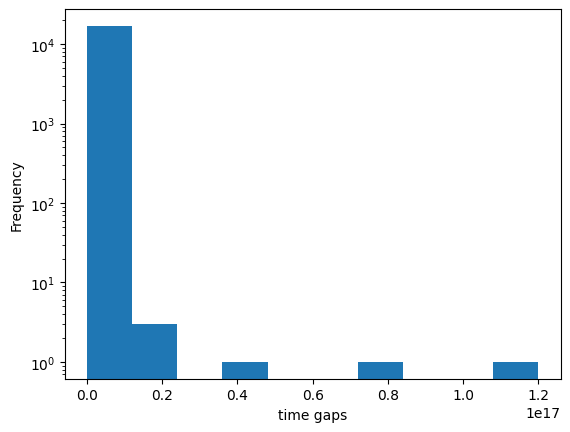

In [ ]:
ax = eqGoodData['gaps'].plot(kind = 'hist', logy= True)

ax.set_xlabel("time gaps (ns)")

Fig. 1: A histogram of the "raw" time gaps during the stationary earthquake periods. Note that the x-axis is on the power of 17. The histogram seems to peak at around 0.0 to 0.1. Though, it can be seen that there are large gaps between the bins.

The thing that worries me is that by removing some sections of the data to use only stationary periods we created some artificially large gaps: gaps of order ~month. How many nanoseconds in a month? remove all gaps that are larger than about a month and see how the distribution looks (make another histogram).

Text(0.5, 0, 'time gaps (min)')

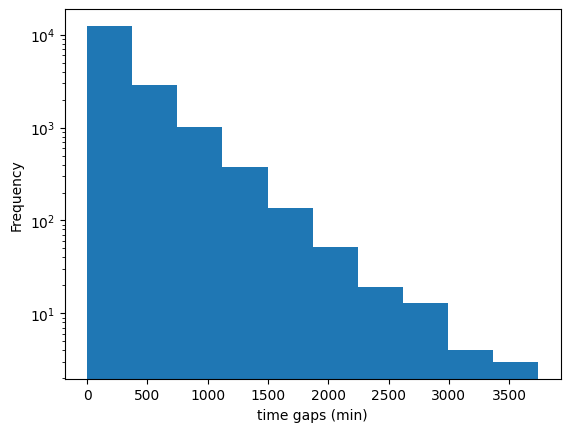

In [ ]:
# your code here

#stationary periods; gaps of order month.
#transform the time differences from ns to minutes
#and remove gaps above a month



nano = eqGoodData["gaps"].values

sec = nano * 10**-9

min = sec/60
##
timegaps_mins = min

eqGoodData['gaps min'] = min

##

#now make threshold. how many minutes in a month? 43200 mins per month (30 days)
#use broadcasting


goodgaps = eqGoodData['gaps min'] <= 43200
eqGoodData = eqGoodData[goodgaps]

eqGoodData.head()

ax = eqGoodData['gaps min'].plot(kind = 'hist', logy= True, x="time difference (min)")

ax.set_xlabel("time gaps (min)")




Fig. 2: A histogram of the time gaps (in minutes), after removing gaps on the order of a month (=30 days ~ 43 200 mins). The frequency decreases as the time gaps between earthquake stationary periods increase, implying there might be an inverse relationship between them.

# data analysis

### important: the paper does not do it but I want you to formally choose a threshold before you do this test. Choose a p-value (=$\alpha$ thresold: call your variable ```alpha```) of 3-$\sigma$.

In [ ]:
eqGoodData
len(eqGoodData)

# print(eqGoodData['mag'].dtypes)

16930

To non-dimensionalize (/rescale) our time gaps, we would extract data based on the magnitude threshold M, and divide the gaps by their mean. There is also a fixed cutoff value m, in which after non-dimensionalizing, we would disregard values below m in computing the KS-test. The values of m in this study are 0.01 and 0.001.

In [ ]:


def magstat(M, m): #m is cutoff. M is magnitude threshold
  mag_thresh = eqGoodData['mag'] >= M


  #make a new DF

  #also for testing this fn, make sure the threshold M works
  eqStatData = eqGoodData[mag_thresh]

  #ok i tried printing this^ and it looks good.
  # return len(eqStatData)

  gap_mean = eqStatData['gaps'].mean()
  scaled_gap = eqStatData['gaps'] / gap_mean
  # return scaled_gap, len(scaled_gap)

  post_cutoff = scaled_gap >= m
  mag_stat = (scaled_gap[post_cutoff]).astype("float64")
  return mag_stat
#   #will return an array of the timegaps










In [ ]:
m1 = 0.01
m2 = 0.001
m1_mag20 = magstat(2.0, m1)
m1_mag25 = magstat(2.5, m1)
m1_mag30 = magstat(3.0, m1)
m1_mag35 = magstat(3.5, m1)
m1_mag40 = magstat(4.0, m1)
m2_mag20 = magstat(2.0, m2)
m2_mag25 = magstat(2.5, m2)
m2_mag30 = magstat(3.0, m2)
m2_mag35 = magstat(3.5, m2)
m2_mag40 = magstat(4.0, m2)

#returns: (statistic, pvalue, stat loc, stat sign)


In [ ]:
#now for calculating the KS statistic and p values

#sorry i'm really hardcoding this

##m1

m1_20v25 = sp.stats.kstest(m1_mag20, m1_mag25)
m1_20v30 = sp.stats.kstest(m1_mag20, m1_mag30)
m1_20v35 = sp.stats.kstest(m1_mag20, m1_mag35)
m1_20v40 = sp.stats.kstest(m1_mag20, m1_mag40)

m1_25v30 = sp.stats.kstest(m1_mag25, m1_mag30)
m1_25v35 = sp.stats.kstest(m1_mag25, m1_mag35)
m1_25v40 = sp.stats.kstest(m1_mag25, m1_mag40)

m1_30v35 = sp.stats.kstest(m1_mag30, m1_mag35)
m1_30v40 = sp.stats.kstest(m1_mag30, m1_mag40)

m1_35v40 = sp.stats.kstest(m1_mag35, m1_mag40)

#lengths for N
m1_20len= len(m1_mag20)
m1_25len= len(m1_mag25)
m1_30len= len(m1_mag30)
m1_35len= len(m1_mag35)
m1_40len= len(m1_mag40)

print("N values 2.0 to 4.0:", m1_20len, m1_25len, m1_30len, m1_35len, m1_40len)

#data below organized in row;columns
#values above diagonal. they are the p-values as percentages:

r0c1 = m1_20v25[1]*100
r0c2 = m1_20v30[1]*100
r0c3 = m1_20v35[1]*100
r0c4 = m1_20v40[1]*100

r1c2 = m1_25v30[1]*100
r1c3 = m1_25v35[1]*100
r1c4 = m1_25v40[1]*100

r2c3 = m1_30v35[1]*100
r2c4 = m1_30v40[1]*100

r3c4 = m1_35v40[1]*100
print("row0 above: ", r0c1, r0c2, r0c3, r0c4)
print("row1 above: ", r1c2, r1c3, r1c4)
print("row2 above: ", r2c3, r2c4)
print("row3 above: ", r3c4)

#now for values below diagonal
r1c0  = m1_20v25[0]

r2c0 = m1_20v30[0]
r2c1 = m1_25v30[0]

r3c0 = m1_20v35[0]
r3c1 = m1_25v35[0]
r3c2 = m1_30v35[0]

r4c0 = m1_20v40[0]
r4c1 = m1_25v40[0]
r4c2 = m1_30v40[0]
r4c3 = m1_35v40[0]

print("row1 below: ", r1c0)
print("row2 below: ", r2c0, r2c1)
print("row3 below: ", r3c0, r3c1, r3c2)
print("row4 below: ", r4c0, r4c1, r4c2, r4c3)



N values 2.0 to 4.0: 16092 4288 1100 304 83
row0 above:  59.06051378225191 80.1796781393257 18.584150258571018 14.847316763592916
row1 above:  98.37506663331249 25.194231070124395 15.579489727948353
row2 above:  29.471979797997054 15.573777783329698
row3 above:  69.7746453510048
row1 below:  0.01321494225368311
row2 below:  0.019896052245045537 0.015349389416553595
row3 below:  0.0625678663474496 0.059762863315003925 0.06253588516746411
row4 below:  0.12311288404924692 0.12308094317568782 0.12627601314348302 0.08485256816740647


In [ ]:
##m2

m2_20v25 = sp.stats.kstest(m2_mag20, m2_mag25)
m2_20v30 = sp.stats.kstest(m2_mag20, m2_mag30)
m2_20v35 = sp.stats.kstest(m2_mag20, m2_mag35)
m2_20v40 = sp.stats.kstest(m2_mag20, m2_mag40)

m2_25v30 = sp.stats.kstest(m2_mag25, m2_mag30)
m2_25v35 = sp.stats.kstest(m2_mag25, m2_mag35)
m2_25v40 = sp.stats.kstest(m2_mag25, m2_mag40)

m2_30v35 = sp.stats.kstest(m2_mag30, m2_mag35)
m2_30v40 = sp.stats.kstest(m2_mag30, m2_mag40)

m2_35v40 = sp.stats.kstest(m2_mag35, m2_mag40)

#lengths for N
m2_20len= len(m2_mag20)
m2_25len= len(m2_mag25)
m2_30len= len(m2_mag30)
m2_35len= len(m2_mag35)
m2_40len= len(m2_mag40)

print("N values 2.0 to 4.0:", m2_20len, m2_25len, m2_30len, m2_35len, m2_40len)

#data below organized in row;columns
#values above diagonal. they are the p-values as percentages:

r0c1 = m2_20v25[1]*100
r0c2 = m2_20v30[1]*100
r0c3 = m2_20v35[1]*100
r0c4 = m2_20v40[1]*100

r1c2 = m2_25v30[1]*100
r1c3 = m2_25v35[1]*100
r1c4 = m2_25v40[1]*100

r2c3 = m2_30v35[1]*100
r2c4 = m2_30v40[1]*100

r3c4 = m2_35v40[1]*100
print("row0 above: ", r0c1, r0c2, r0c3, r0c4)
print("row1 above: ", r1c2, r1c3, r1c4)
print("row2 above: ", r2c3, r2c4)
print("row3 above: ", r3c4)

#now for values below diagonal
r1c0  = m2_20v25[0]

r2c0 = m2_20v30[0]
r2c1 = m2_25v30[0]

r3c0 = m2_20v35[0]
r3c1 = m2_25v35[0]
r3c2 = m2_30v35[0]

r4c0 = m2_20v40[0]
r4c1 = m2_25v40[0]
r4c2 = m2_30v40[0]
r4c3 = m2_35v40[0]

print("row1 below: ", r1c0)
print("row2 below: ", r2c0, r2c1)
print("row3 below: ", r3c0, r3c1, r3c2)
print("row4 below: ", r4c0, r4c1, r4c2, r4c3)


#Only small enough values of p should lead to
#the rejection of the null hypothesis.


N values 2.0 to 4.0: 16791 4524 1174 328 86
row0 above:  7.74572669784106 13.233078013395883 7.5818744270370715 18.352582194578595
row1 above:  76.17282777720473 15.860048507603155 22.92552055867681
row2 above:  25.48470739693125 28.275900230511787
row3 above:  36.73073672653259
row1 below:  0.021309492722749818
row2 below:  0.03502677521431177 0.02171044604810686
row3 below:  0.07075364125090244 0.0637844773673201 0.06259608592678771
row4 below:  0.11587464491636579 0.11124647872843542 0.10823659918386752 0.10855076574021554


Follow the instructions (algorithm) in **Section 3 paragraph 3** and compare your results with the results in table 1 with a threshold  of = 0.01 and 0.001

Do it for all 5 magnitude thresholds as indicated in the paper (and in Table 1).

Note that the x axis in plot Fig 1 is in _log space_. Use ```np.log10()``` to take the logarithm of the time gaps.

The pseudocode for the algorithm is [here](https://github.com/fedhere/DSPS_FBianco/blob/main/HW3/Corral2018pseudocodeKStest.md).


Reproduce the paper Fig 1 and Table 1. In the Table report the size of each dataset after cleaning the value of the statistic and the p-value, as done in Corral 2018. Use the scipy function for the 2 sample KS test (resources [here](https://colab.research.google.com/notebooks/markdown_guide.ipynb#scrollTo=70pYkR9LiOV0) to learn about the table syntax in markdown)

your table here:

| m = 0.01 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16092 | - | 59.06051378225191% | 80.1796781393257% | 18.584150258571018% | 14.847316763592916% |
|M >= 2.5 | 4288 | 0.01321494225368311 | - | 98.37506663331249% | 25.194231070124395% | 15.579489727948353% |
|M >= 3.0 | 1100 | 0.019896052245045537 | 0.015349389416553595 | - | 29.471979797997054% | 15.573777783329698% |
|M >= 3.5 | 304 | 0.0625678663474496 | 0.059762863315003925 | 0.06253588516746411 | - | 69.7746453510048% |
|M >= 4.0 | 83 | 0.12311288404924692 | 0.12308094317568782 | 0.12627601314348302 | 0.08485256816740647 | - |

Table 1: The KS - test run for each pair of distributions based on the magnitude threshold M, for m = 0.01. N is the number of datapoints in the sample (size of the dataset). The KS statistic d are the values below the diagonal, and the corresponding p-values are above it.


| m = 0.001 | N | M >= 2.0 | M >= 2.5 | M >= 3.0 | M >= 3.5 | M >= 4.0 |
| --- | --- | --- | --- | --- | --- | --- |
|M >= 2.0 | 16791 | - | 7.74572669784106% | 13.233078013395883% | 7.5818744270370715% | 18.352582194578595% |
|M >= 2.5 | 4524 | 0.021309492722749818 | - | 76.17282777720473% | 15.860048507603155% | 22.92552055867681% |
|M >= 3.0 | 1174 | 0.03502677521431177 | 0.02171044604810686 | - | 25.48470739693125% | 28.275900230511787% |
|M >= 3.5 | 328 | 0.07075364125090244 | 0.0637844773673201 | 0.06259608592678771 | - | 36.73073672653259% |
|M >= 4.0 | 86 | 0.11587464491636579 | 0.11124647872843542 | 0.10823659918386752 | 0.10855076574021554 | - |

Table 2: Same as for Table 1, but for m = 0.001.

The alpha value we select is 3σ ~ 99.7%. Hence, the threshold value for the p-value would be 0.3% = 0.003, where only below that will the null be rejected.

In Table 1, all the p-values are larger than 14% = 0.14, (in fact, there is a value larger than 98%). Table 2 shows p-values all larger than 13%=0.13. These values are all larger than the threshold value 0.3%, hence the null hypothesis cannot be rejected. This test then shows that each pair of distribution come from the same distribution.

<function matplotlib.pyplot.show(close=None, block=None)>

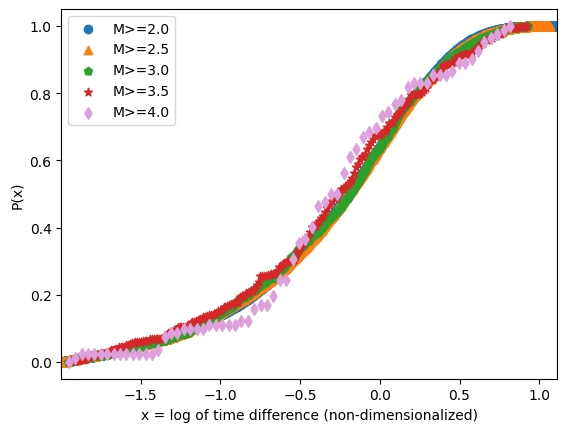

In [ ]:
#https://stackoverflow.com/questions/10640759/how-to-get-the-cumulative-distribution-function-with-numpy


logm20 = np.log10(m1_mag20)
logm25 = np.log10(m1_mag25)
logm30 = np.log10(m1_mag30)
logm35 = np.log10(m1_mag35)
logm40 = np.log10(m1_mag40)

h1, x1 = np.histogram(logm20, bins = 1620)
dx1 = x1[1]-x1[0]
f1 = np.cumsum(h1)*dx1
normf1 = (f1 - f1.min())/(f1.max()-f1.min())

h2, x2 = np.histogram(logm25, bins = 4700)
dx2 = x2[1]-x2[0]
f2 = np.cumsum(h2)*dx2
normf2 = (f2 - f2.min())/(f2.max()-f2.min())

h3, x3 = np.histogram(logm30, bins = 1000)
dx3 = x3[1]-x3[0]
f3 = np.cumsum(h3)*dx3
normf3 = (f3 - f3.min())/(f3.max()-f3.min())

h4, x4 = np.histogram(logm35, bins = 250)
dx4 = x4[1]-x4[0]
f4 = np.cumsum(h4)*dx4
normf4 = (f4 - f4.min())/(f4.max()-f4.min())

h5, x5 = np.histogram(logm40, bins = 70)
dx5 = x5[1]-x5[0]
f5 = np.cumsum(h5)*dx5
normf5 = (f5 - f5.min())/(f5.max()-f5.min())

plt.scatter(x1[1:], normf1, label="M>=2.0")
plt.scatter(x2[1:], normf2, label="M>=2.5", marker='^')
plt.scatter(x3[1:], normf3, label="M>=3.0", marker="p")
plt.scatter(x4[1:], normf4, label="M>=3.5", marker = '*')
plt.scatter(x5[1:], normf5, label="M>=4.0", marker="d", color='plum')

plt.xlabel("x = log of non-dimensionalized time difference")
plt.ylabel("P(x)")
plt.autoscale(enable=True, axis='x', tight=True)
plt.legend()
plt.show

Fig. 3: A graph of the non-dimensionalized earthquake time difference log on the x-axis, and its cumulative distribution on the y-axis, at a minimum cutoff x-value m = 0.01. The magnitude thresholds are shown in the legend.

The graphs tend to follow the same distribution, which aligns with our results from the KS-test documented in Table 1.

In other words, we have shown that at different magnitude scales, the time gaps between earthquakes follow the same distribution, hence indicative of a consistent scaling law as described in the paper.

Did you find any statistical significant differences between the distributions? What does it mean? Is your result identical to Correll's 2018? Why or why not? **Discuss!**

Looking at Fig. 3, the 5 distributions seem to follow the same shape, though it is quite less obvious for the M>=4.0 graph. As stated previously, this confirms our results from the KS-test in Table 1, in which we cannot reject the null hypothesis that says each pair of datasets come from the same distribution. Moreover, one looking at Fig.3 would expect that the p-values related to the M >= 4.0 threshold would be smaller than those with the other M values, because out of the 5 graphs, M >= 4.0 seems to show the most "offset" scatterplot. This is true in Table 1, as the first 3 p-values in the rightmost column are all smaller than the values in their corresponding rows.

Extending this observation, one can also see a trend in Table 1 for m = 0.01 above, where the p-values in the same row generally get smaller and smaller as we move further right in the columns (except forthe M>=2.0 and M>=2.5 comparison). This implies that as we move to higher M thresholds,  the distribution would be "less similar" to the expected distribution in comparison (and notice that the statistic d value would get larger). A strong factor of this trend could be the N value, which decreases as the magnitude threshold increases. As we have seen in the beginning, the probability distribution statistic p depends only on N.

Following this trend, it would make sense to think that if we get another larger threshold, we might get an even more "offset" scatterplot graph than M>=4.0. However, Table 2 for m = 0.001 doesn't seem to necessarily follow this trend, althought the statistic d still increases as we go down the rows. Hence, it might work differently for different m values, and we might need to dig deeper to look for a relationship between p-values and parameters in the test.

Corral (2018) has a similar graph plotting the cdfs of the magnitude datasets (Fig. 1 of the paper), where the scatterplots do seem to follow a similar distribution in a similar way as in Fig. 3 of this notebook. He describes that the scaling seems rather good, except for the case M >= 4.0, which could be the case in this notebook study too. In addition, as we look at Table 1 in the paper, the p-values don't seem to follow the same trend as in Table 1 of this notebook, though all of them are well above the threshold value 0.3%. Therefore, the null hypothesis still cannot be rejected, and each pair of datasets come from the same distribution. At the end, we came with the same conclusion as Corral (2018).

Moreover, a further question following the trend in Table 1 would be: as we keep on increasing the magnitude threshold, would it reach a point when the p-value is small enough that the null hypothesis must be rejected? Corral (2018) conducted the test for smaller m values, and said that even with m= 10^-4, all p-values are above 0.2 except for some pairs involving M>=2.0. Hence, it might be possible to get values smaller than the threshold p-value as we experiment around our parameter values in this regard. This can be a direction of further study on this subject.



### "extra credits"

**How could you _force_ a significant result?**
Organize your result for different magnitude threshold in a numpy array (it should be a 5x5 array) for both cutoffs (0.01 and 0.001). Each of these arrays should contain the p-value for the pair of distributions i,j in cell \[i\]\[j\] and \[j\]\[i\]. Use ```imshow``` to visualize this 2D data. FIrst visualize the matrix itself as done below.

In [1]:
# # your code here

# pl.imshow((ks_001));
# pl.axis('off')
# cb = pl.colorbar()
# cb.ax.set_ylabel(r'$p$-value')
# pl.title("KS test results");
# #add a caption


Now visualize the result as a matrix where the cells are white if the results is not statistically significant and red otherwise.
After doing it fot the set alpha threshold, lower your alpha threshold so that at least one pair of distribution has a statistically significant difference. **Warning!! this is an _unethical and horrifying practice_! Once you chose your significance threshold you are never allowed to change it! Why? Discuss**

Redoing it for threshold 0001